# Final Project Submission

Please fill out:
* Student name: Gabby Amparo
* Student pace: full time
* Scheduled project review date/time: Thurday, October 29, 2020 @ 10AM
* Instructor name: Rafael Carrasco
* Blog post URL: 


***
# Business Problem


A property investor is looking to "flip" houses in King County, WA for profit. "Flipping houses" is a term used for the action of buying property (in this case houses) that are in poor to average conditions in a good, well-established neighborhood (most likely in a expensive housing market) for cheap and renovating those houses and selling them for higher than they were bought for in order to make profit. The property investor wants to know if King County, WA is a good housing market to invest in and flip houses for profit.

***
# General Cleaning of kc_house_data.csv

In [1]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
#importing cvs file and saving it under a variable
kc_house_df = pd.read_csv('./data/kc_house_data.csv')

***
## Review kc_house_data
Info obtained from https://www.kaggle.com/harlfoxem/housesalesprediction about dataset:

"This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015."

In [3]:
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

***
## Build first model

In [6]:
# Importing functions that were created 
import StatsFunctions as sf

In [7]:
target = 'price'
features_to_use = ['bedrooms', 'condition']

In [8]:
ols = sf.check_model(df=kc_house_df, features_to_use=features_to_use, target_col=target, show_summary=True)

bedrooms surpassed threshold with vif=9.97191342135912
condition surpassed threshold with vif=9.971913421359131
Model contains multicollinear features
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                          2.695e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:32:01   Log-Likelihood:                     -3.0631e+05
No. Observations:               21597   AIC:                                  6.126e+05
Df Residuals:                   21595   BIC:                                  6.126e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                    

***
## Check count of columns of interest
Doing this helps answer important questions about the data such as: "What scale do the 'grade' and 'condition' columns range from?" or 'How many homes have more than 4 bedrooms?"

In [9]:
kc_house_df['condition'].value_counts() 

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

*We now know that the condition ratings of the houses range from 1-5*

In [10]:
kc_house_df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

*We now know that the grade ratings of the houses range from 1-13*

**I obtained a [pdf](https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2017/residential-westcentral/~/media/depts/assessor/documents/AreaReports/2017/Residential/013.ashx) from the King County website that explains the condition and grade ratings. Below is a screenshot of the rating information:**

<img src= "images/cond and grade info.png" />

In [11]:
kc_house_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
# One house has 33 bedrooms. But the sqft is low so I will eliminate that outlier
kc_house_df = kc_house_df.drop(15856, axis = 0)

***
## Check for duplicates and delete if any

In [13]:
kc_house_df[kc_house_df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [14]:
print(kc_house_df.shape)
print(len(kc_house_df['id'].unique()))

(21596, 21)
21419


There appear to be some duplicates in the 'id' column. Let's deal with them.

In [15]:
id_dups_series = kc_house_df.duplicated(subset=['id'], keep = False)
id_dups = kc_house_df[id_dups_series]
kc_house_df.drop_duplicates(subset=['id'], keep='last', inplace=True)

In [16]:
print(kc_house_df.shape)
print(len(kc_house_df['id'].unique()))

(21419, 21)
21419


***
## Dealing with Nan values and converting column data types to appropriate data types
Dealing with Nan values depends on the information you want to use. If the columns you would like to use have Nan values, then you must deal with them. If not then you can just create a new dataframe with the columns you would like to use. However I like to get rid of the Nan values so thats what I will do.

In [17]:
# The 'date' column is an object so we should convert it to a datetime64[ns]
kc_house_df['date'] = kc_house_df['date'].astype('datetime64[ns]')

In [18]:
# Checking to see if conversion was successful
print(kc_house_df['date'].dtypes)

datetime64[ns]


In [19]:
# Check for Nan values in the columns
kc_house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [20]:
# Remove Nan rows from dataframe if they make up less than 1% of the data
kc_house_df = kc_house_df.dropna(subset=['view', 'waterfront'])

In [21]:
# Checking value counts for columns with Nan values
kc_house_df['waterfront'].value_counts()

0.0    18864
1.0      145
Name: waterfront, dtype: int64

In [22]:
kc_house_df['yr_renovated'].value_counts()

0.0       14987
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

We can see that there is an extraneous value of 0.0 that is being used as a placeholder. This could mean the following:
* 0.0 means that the house was never renovated
* 0.0 means that the house renovation history is not known

I do not plan on using 'waterfront' or 'yr_renovated' columns for my project so I will just leave them as is.

In [23]:
# Making sure 'view' Nan values were deleted
kc_house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3374
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

***
## Investigating columns
Here, I will be investiagting columns a bit deeper so I can better understand them and answer my questions.

In [24]:
kc_house_df['bedrooms'].describe()

count    19009.000000
mean         3.373823
std          0.903126
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [25]:
kc_house_df['condition'].describe()

count    19009.000000
mean         3.410805
std          0.649925
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [26]:
kc_house_df['grade'].describe()

count    19009.000000
mean         7.665159
std          1.174481
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [27]:
kc_house_df['sqft_living'].describe()

count    19009.000000
mean      2084.755747
std        922.595214
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [28]:
kc_house_df['sqft_lot'].describe()

count    1.900900e+04
mean     1.509645e+04
std      4.090052e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.616000e+03
75%      1.072300e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [29]:
kc_house_df['price'].describe()

count    1.900900e+04
mean     5.429366e+05
std      3.710642e+05
min      7.800000e+04
25%      3.249000e+05
50%      4.520000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

***
## Drop any columns that will not be used

In [30]:
kc_house_df = kc_house_df.drop(['sqft_basement', 'waterfront', 'bathrooms', 'view','yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'id', 'date'], axis=1)

In [31]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long
1,538000.0,3,2570,7242,2.0,3,7,2170,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,3,6,770,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,5,7,1050,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,3,8,1680,98074,47.6168,-122.045
5,1230000.0,4,5420,101930,1.0,3,11,3890,98053,47.6561,-122.005


***
## Create scatter matrix

I did an initial scatter matrix to help identifty categorical and continuous columns and to get a feel for the data

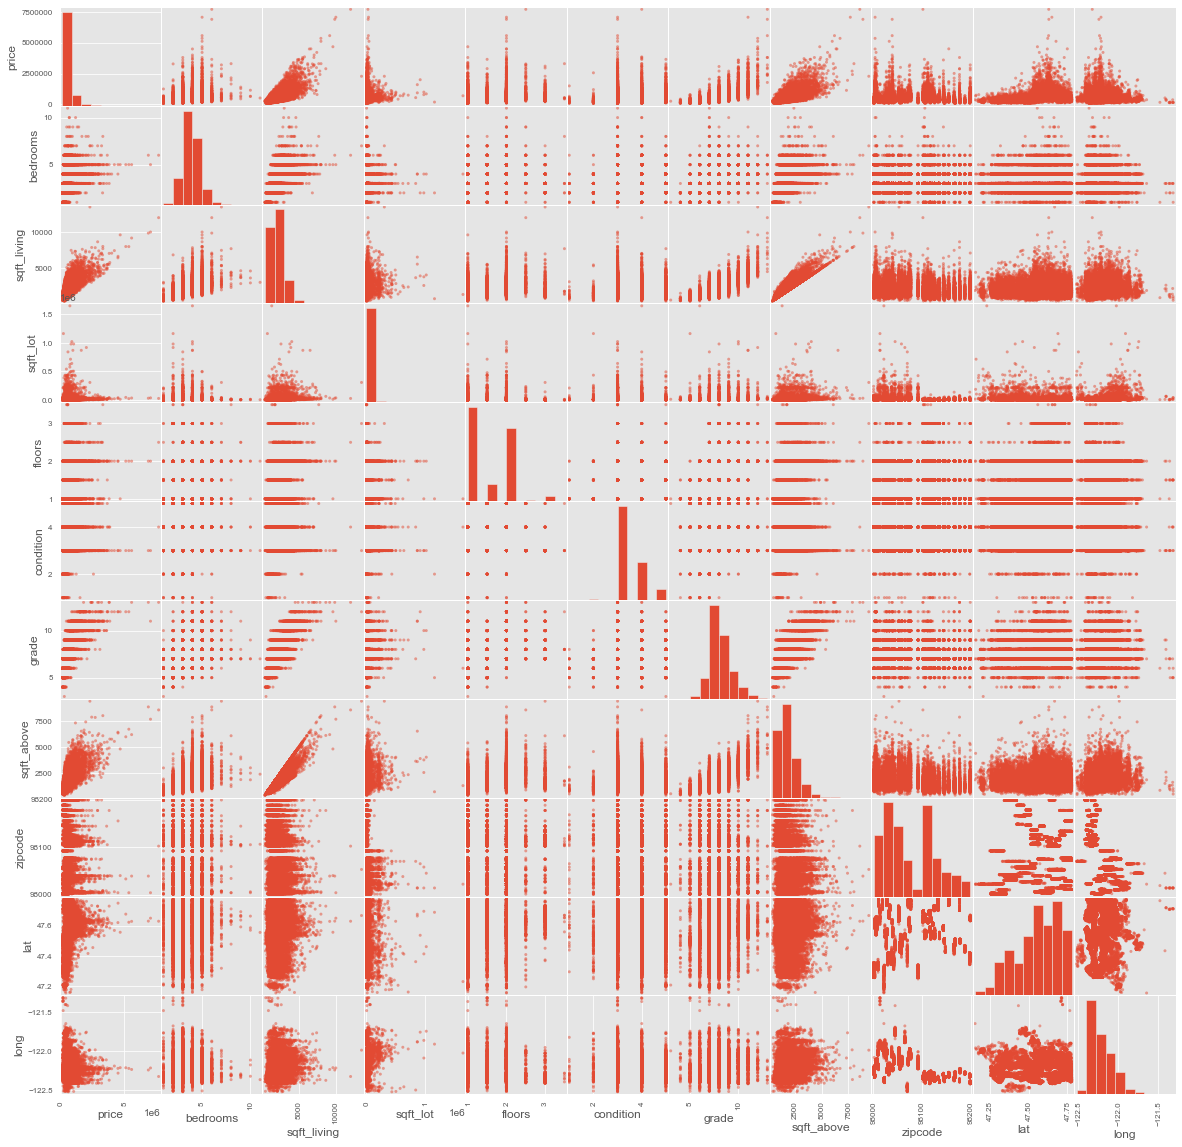

In [32]:
pd.plotting.scatter_matrix(kc_house_df, figsize=(20,20))
plt.show()

***
## Creating histograms/distplots for columns of interest

<AxesSubplot:xlabel='sqft_living'>

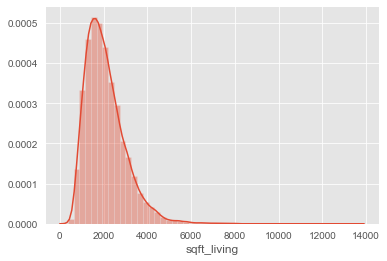

In [33]:
sns.distplot(kc_house_df['sqft_living'])

<AxesSubplot:xlabel='sqft_lot'>

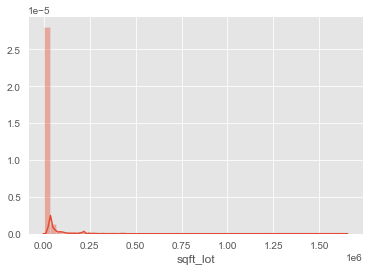

In [34]:
sns.distplot(kc_house_df['sqft_lot'])

Definitely crazy outliers here. Gotta deal with them

<AxesSubplot:xlabel='zipcode'>

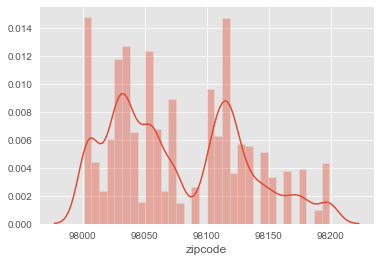

In [35]:
sns.distplot(kc_house_df['zipcode'])

<AxesSubplot:xlabel='sqft_above'>

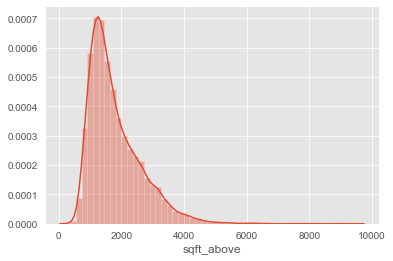

In [36]:
sns.distplot(kc_house_df['sqft_above'])
# Positive skewness

<AxesSubplot:xlabel='condition'>

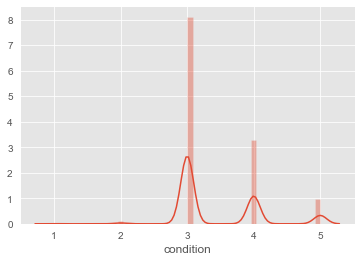

In [37]:
sns.distplot(kc_house_df['condition'])

<AxesSubplot:xlabel='price'>

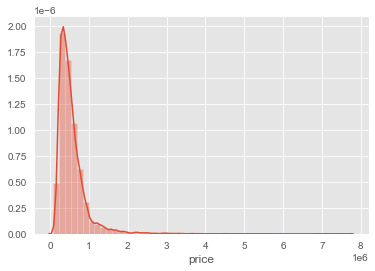

In [38]:
sns.distplot(kc_house_df['price'])

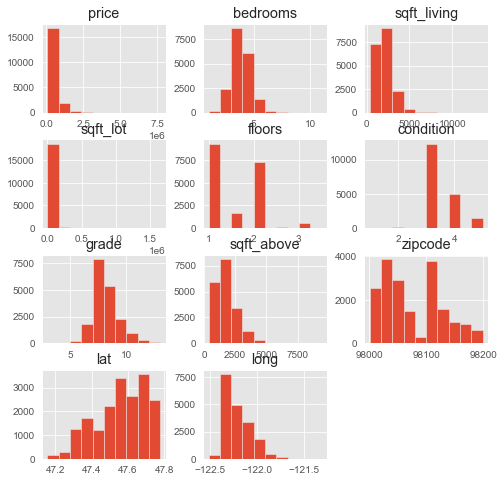

In [39]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
kc_house_df.hist(ax = ax);

***
## Let's deal with the outliers

<AxesSubplot:xlabel='price'>

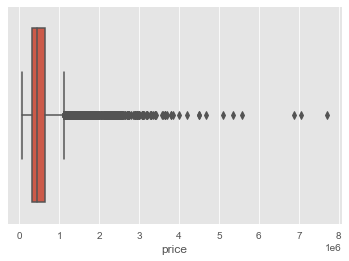

In [40]:
# Creating box plots to show outliers
sns.boxplot(x=kc_house_df['price'])

There are a good amount of outliers. A majority of them are on the left of the boxplot, meaning that these homes are probably really expensive, so I will remove them using the z score.

<AxesSubplot:xlabel='bedrooms'>

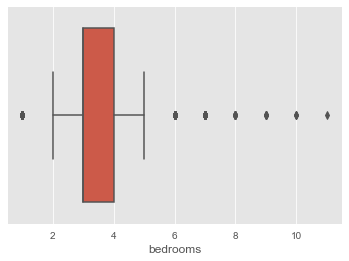

In [41]:
sns.boxplot(x=kc_house_df['bedrooms'])

<AxesSubplot:xlabel='sqft_living'>

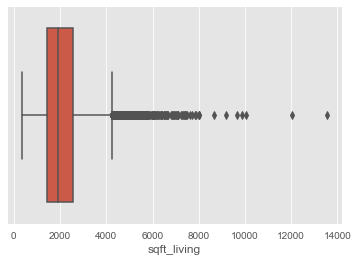

In [42]:
sns.boxplot(x=kc_house_df['sqft_living'])

<AxesSubplot:xlabel='sqft_above'>

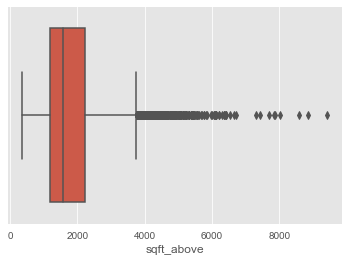

In [43]:
sns.boxplot(x=kc_house_df['sqft_above'])

In [44]:
z=np.abs(scs.zscore(kc_house_df))
print(z)

[[0.0133042  0.41393208 0.52596958 ... 0.88691949 1.15996434 0.74721892]
 [0.97812223 1.52122662 1.42509988 ... 0.92947471 1.28180104 0.1364241 ]
 [0.16456728 0.69336245 0.13522618 ... 1.09290234 0.28333199 1.27278657]
 ...
 [0.3852173  0.69336245 0.24414843 ... 1.28015947 0.35614564 1.05261634]
 [0.37955506 1.52122662 1.15411801 ... 1.24270805 0.24727046 0.60517362]
 [0.58734398 1.52122662 1.15411801 ... 1.24270805 0.24510768 0.60517362]]


In [45]:
z_df = kc_house_df[(z < 3).all(axis=1)]

In [46]:
kc_house_df.shape, z_df.shape

((19009, 11), (17925, 11))

In [47]:
kc_house_df = z_df

<AxesSubplot:xlabel='price'>

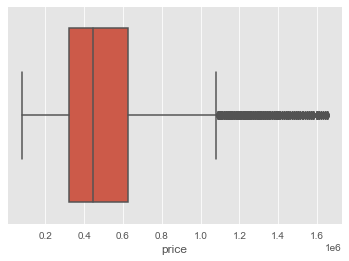

In [48]:
sns.boxplot(x=kc_house_df['price'])

<AxesSubplot:xlabel='bedrooms'>

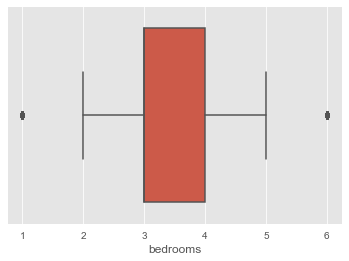

In [49]:
sns.boxplot(x=kc_house_df['bedrooms'])

<AxesSubplot:xlabel='sqft_living'>

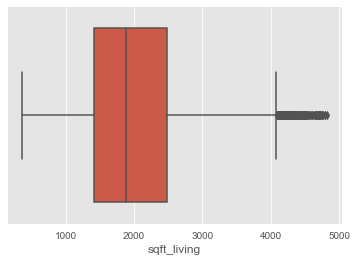

In [50]:
sns.boxplot(x=kc_house_df['sqft_living'])

<AxesSubplot:xlabel='sqft_above'>

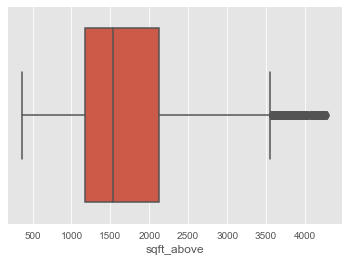

In [51]:
sns.boxplot(x=kc_house_df['sqft_above'])

Boxplots look a lot better now that outliers have been removed!

***
## Looking at correlation and multicollinearity of features

In [52]:
kc_house_df.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long
price,1.000000,0.306647,0.637476,0.090776,0.265016,0.045473,0.648041,0.528049,-0.016294,0.404629,0.039670
bedrooms,0.306647,1.000000,0.610137,0.086051,0.167884,0.018136,0.347204,0.489559,-0.164628,-0.034112,0.172823
sqft_living,0.637476,0.610137,1.000000,0.222143,0.346054,-0.067507,0.719893,0.847515,-0.197477,0.036890,0.286425
sqft_lot,0.090776,0.086051,0.222143,1.000000,-0.092537,0.037234,0.137504,0.207111,-0.181343,-0.079898,0.273520
floors,0.265016,0.167884,0.346054,-0.092537,1.000000,-0.280678,0.455124,0.538187,-0.056642,0.043384,0.140727
condition,0.045473,0.018136,-0.067507,0.037234,-0.280678,1.000000,-0.170915,-0.178561,-0.007313,-0.019585,-0.095780
grade,0.648041,0.347204,0.719893,0.137504,0.455124,-0.170915,1.000000,0.714804,-0.179733,0.109499,0.230542
sqft_above,0.528049,0.489559,0.847515,0.207111,0.538187,-0.178561,0.714804,1.000000,-0.266273,-0.018245,0.399115
zipcode,-0.016294,-0.164628,-0.197477,-0.181343,-0.056642,-0.007313,-0.179733,-0.266273,1.000000,0.277418,-0.579829
lat,0.404629,-0.034112,0.036890,-0.079898,0.043384,-0.019585,0.109499,-0.018245,0.277418,1.000000,-0.132593


Use the correlation method .corr() to determine the relationship/association of between the currenct columns

* **If two variables have a correlation of +0.9**: the change in one item results in a similar change to another item
* **If two variables have a correlation of -0.9**: the change in one variable results in an opposite change in the other variable.
* **If two variables have a correlation near 0**: there would be no effect

In [53]:
df_pred = kc_house_df.iloc[:,1:9]
df_pred.head()

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode
1,3,2570,7242,2.0,3,7,2170,98125
2,2,770,10000,1.0,3,6,770,98028
3,4,1960,5000,1.0,5,7,1050,98136
4,3,1680,8080,1.0,3,8,1680,98074
6,3,1715,6819,2.0,3,7,1715,98003


Here, I took a copy of the data without the target variable (price) to better understand the correlation of the predictors. I also removed the latitude and longitude columns because I will not be using them for now.

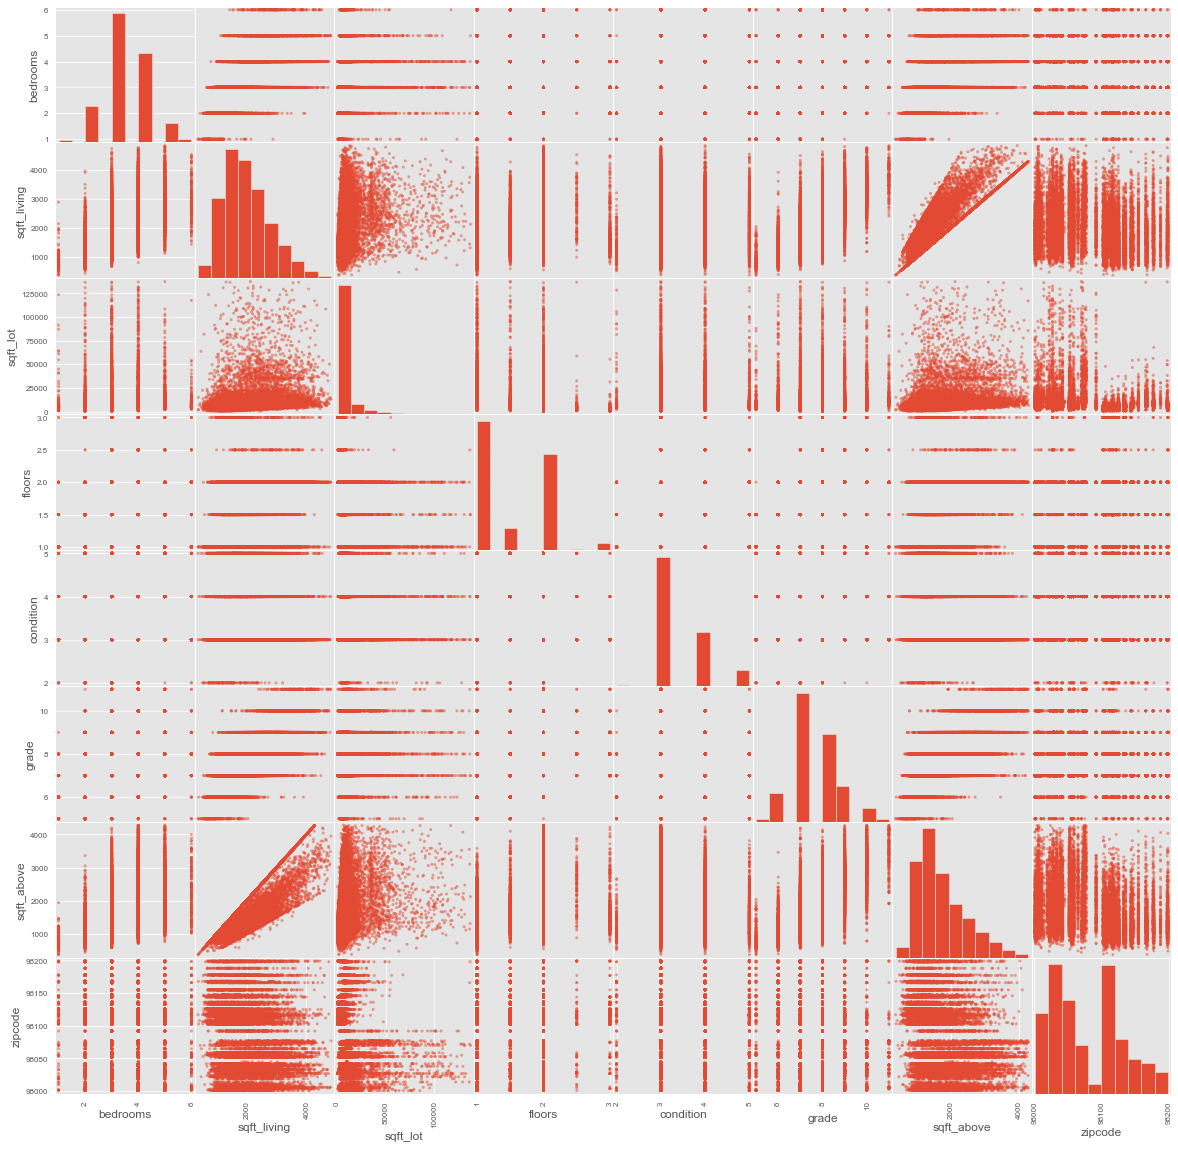

In [54]:
pd.plotting.scatter_matrix(df_pred, figsize=(20,20))
plt.show()

In [55]:
# Create a correlation matrix of the predictors
df_pred.corr()

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode
bedrooms,1.000000,0.610137,0.086051,0.167884,0.018136,0.347204,0.489559,-0.164628
sqft_living,0.610137,1.000000,0.222143,0.346054,-0.067507,0.719893,0.847515,-0.197477
sqft_lot,0.086051,0.222143,1.000000,-0.092537,0.037234,0.137504,0.207111,-0.181343
floors,0.167884,0.346054,-0.092537,1.000000,-0.280678,0.455124,0.538187,-0.056642
condition,0.018136,-0.067507,0.037234,-0.280678,1.000000,-0.170915,-0.178561,-0.007313
grade,0.347204,0.719893,0.137504,0.455124,-0.170915,1.000000,0.714804,-0.179733
sqft_above,0.489559,0.847515,0.207111,0.538187,-0.178561,0.714804,1.000000,-0.266273
zipcode,-0.164628,-0.197477,-0.181343,-0.056642,-0.007313,-0.179733,-0.266273,1.000000


In [56]:
# Create a correlation matrix of booleans that state whether or not correlation is greater than 0.75
abs(df_pred.corr()) > 0.75

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode
bedrooms,True,False,False,False,False,False,False,False
sqft_living,False,True,False,False,False,False,True,False
sqft_lot,False,False,True,False,False,False,False,False
floors,False,False,False,True,False,False,False,False
condition,False,False,False,False,True,False,False,False
grade,False,False,False,False,False,True,False,False
sqft_above,False,True,False,False,False,False,True,False
zipcode,False,False,False,False,False,False,False,True


In [57]:
# Create a dataframe using stackand a subset to return highly correlated pairs

df=df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

In [58]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.847515


There is only one set of variables that is highly correlated, 'sqft_above' and 'sqft_living'

<AxesSubplot:>

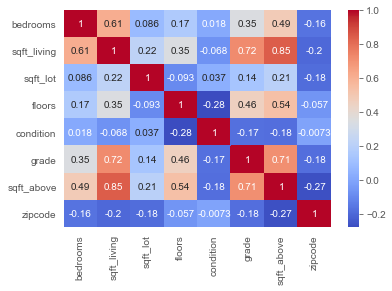

In [59]:
# Make a heatmap visual of correlation of predictors
sns.heatmap(df_pred.corr(), annot=True, cmap="coolwarm")

In [60]:
# To remove collinear features, it is typical to remove one variable per pair. I will remove the "sqft_above" column from the df
df_pred.drop(columns = ['sqft_above'], inplace=True)
kc_house_df.drop(columns = ['sqft_above'], inplace=True)

In [61]:
df_pred.head()

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode
1,3,2570,7242,2.0,3,7,98125
2,2,770,10000,1.0,3,6,98028
3,4,1960,5000,1.0,5,7,98136
4,3,1680,8080,1.0,3,8,98074
6,3,1715,6819,2.0,3,7,98003


In [62]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long
1,538000.0,3,2570,7242,2.0,3,7,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,3,6,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,5,7,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,3,8,98074,47.6168,-122.045
6,257500.0,3,1715,6819,2.0,3,7,98003,47.3097,-122.327


***
## Normalize continuous features

I need to convert all numeric columns to the same scale by normalizing the dataset. I will do this by converting each numeric value to it's corresponding **z-score** for the column, which is obtained by **subtracting the column's mean and then dividing by the column's standard deviation for every value.**

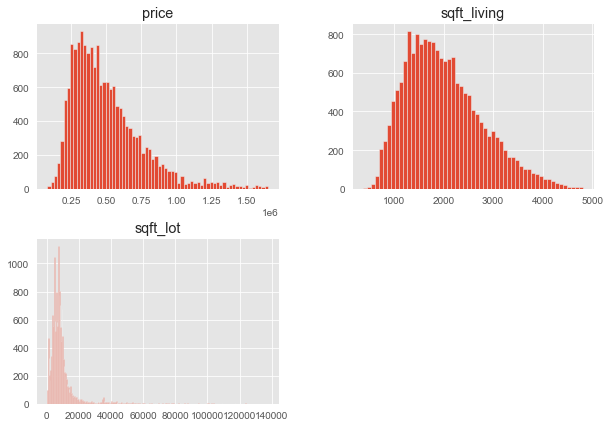

In [63]:
continuous = ['price', 'sqft_living', 'sqft_lot']
categoricals = ['bedrooms', 'floors', 'condition', 'grade', 'zipcode']

kc_house_df[continuous].hist(figsize = (10,7), bins = 'auto');

The continuous variables need to be more normal. 'sqft_lot' column has a lot of zeros so it is best to leave it be.

In [64]:
continuous = ['price', 'sqft_living']
df_cont = kc_house_df[continuous]

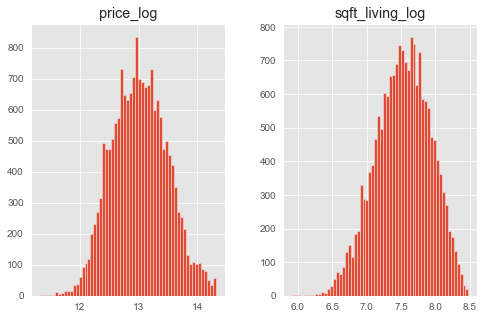

In [65]:
# Performing log transformation on continuous variable

log_names = [f'{column}_log' for column in df_cont.columns]
df_log = np.log(df_cont)
df_log.columns = log_names
df_log.hist(figsize=(8,5), bins = 'auto')
fig.tight_layout()

The histogram looks a lot more normal now!

array([[<AxesSubplot:title={'center':'price_log'}>,
        <AxesSubplot:title={'center':'sqft_living_log'}>]], dtype=object)

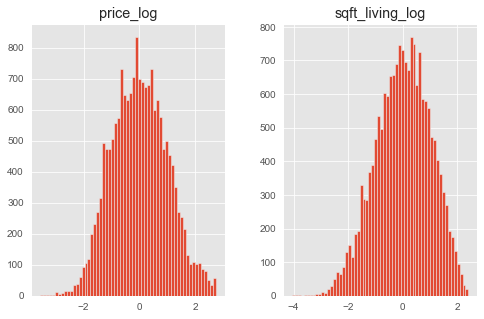

In [66]:
# Standardize the continuous variables
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_cont_log = df_log.apply(normalize)
df_cont_log.hist(figsize = (8,5), bins = 'auto')

***
## Saving dataframes

In [67]:
#kc_house_df.to_csv("kc_df_cleaned.csv", index=False)

#df_cont_log.to_csv("df_cont_log_cleaned.csv", index=False)

#I already have them saved 

***
# Linear Regression/OLS

In [68]:
#importing cvs files and saving them under a variable
kc_house_df = pd.read_csv("./data/kc_df_cleaned.csv")
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long
0,538000.0,3,2570,7242,2.0,3,7,98125,47.7210,-122.319
1,180000.0,2,770,10000,1.0,3,6,98028,47.7379,-122.233
2,604000.0,4,1960,5000,1.0,5,7,98136,47.5208,-122.393
3,510000.0,3,1680,8080,1.0,3,8,98074,47.6168,-122.045
4,257500.0,3,1715,6819,2.0,3,7,98003,47.3097,-122.327


In [69]:
df_cont_log = pd.read_csv("./data/df_cont_log_cleaned.csv")
df_cont_log.head()

,price_log,sqft_living_log
0,0.380995,0.823169
1,-1.927823,-2.213002
2,0.625004,0.140596
3,0.268290,-0.247722
4,-1.172776,-0.195780


***
## One-Hot Encoding categorcial features

I will use one-hot encoding to transfrom categorical columns into binary variables 

In [70]:
categoricals = ['bedrooms', 'floors', 'condition', 'grade']

cat_series = kc_house_df[categoricals]
df_cat = cat_series.astype('category')

In [71]:
df_cat.dtypes

bedrooms     category
floors       category
condition    category
grade        category
dtype: object

In [72]:
df_cat_ohe = pd.get_dummies(df_cat, prefix=categoricals, drop_first = True)

***
## Now, we combine the categorical and continous features

In [73]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([df_cont_log, df_cat_ohe], axis=1)
preprocessed.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,floors_3.0,condition_3,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,0.380995,0.823169,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,-1.927823,-2.213002,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.625004,0.140596,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0.268290,-0.247722,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,-1.172776,-0.195780,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


***
## Check for linearity

I will create a plot of continuous variables using Seaborn to determine if the target variable ('price_log') is linearly related to the input features

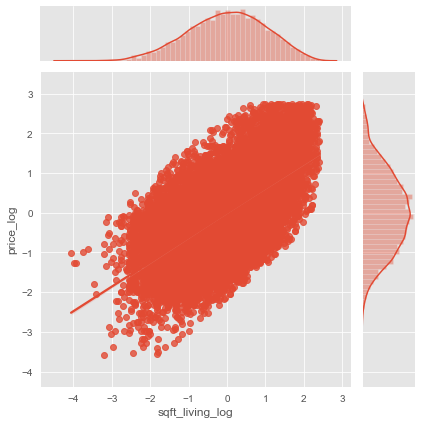

In [74]:
sns.jointplot('sqft_living_log', 'price_log', data=preprocessed, kind='reg')

Kinda hard to see but there is a linear relationship between the two.

***
## Fitting an initial model

In [75]:
features = list(preprocessed.drop('price_log', axis=1))

In [76]:
print(features)

['sqft_living_log', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'condition_3', 'condition_4', 'condition_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']


In [77]:
model = sf.check_model(df=preprocessed, features_to_use=features, target_col='price_log', show_summary=True)

sqft_living_log surpassed threshold with vif=3.025113734712017
Model contains multicollinear features
                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.520
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              1022.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:32:50   Log-Likelihood:                         -18850.
No. Observations:               17925   AIC:                                  3.774e+04
Df Residuals:                   17906   BIC:                                  3.789e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                  

Model shows that 'sqft_living_log' column surpasses vif threshold so I will remove it. This hopefully will help with mulitcollinearity as well.

In [78]:
features.remove('sqft_living_log')

In [79]:
print(features)

['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'condition_3', 'condition_4', 'condition_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']


In [80]:
model = sf.check_model(df=preprocessed, features_to_use=features, target_col='price_log', show_summary=True)

                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.462
Model:                            OLS   Adj. R-squared (uncentered):              0.461
Method:                 Least Squares   F-statistic:                              853.0
Date:                Thu, 29 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:32:51   Log-Likelihood:                         -19884.
No. Observations:               17925   AIC:                                  3.980e+04
Df Residuals:                   17907   BIC:                                  3.994e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

***
## Checking for homoscedasticity

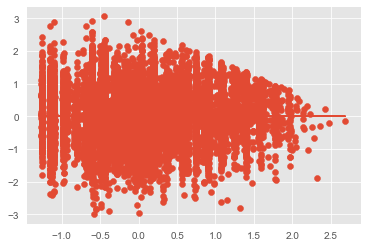

In [81]:
plt.scatter(model.predict(preprocessed[features]), model.resid)
plt.plot(model.predict(preprocessed[features]), [0 for i in range(len(preprocessed))])

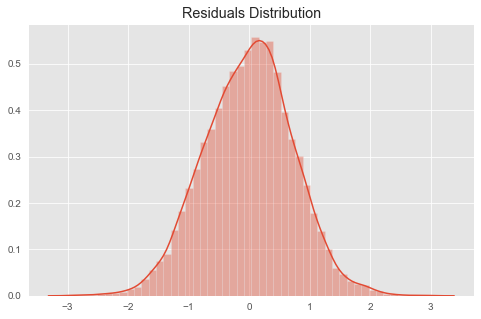

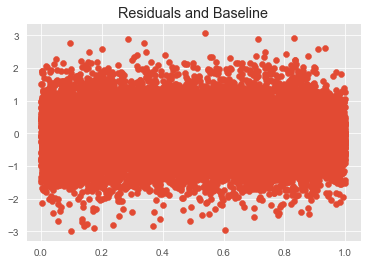

In [82]:
# Plotting residuas to look at distribution
sf.plot_residuals(model)

***
## Checking for Normality

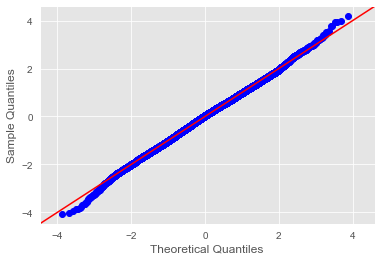

In [83]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)

Wowza! Looks pretty normal to me! However, the models seem to have failed the Shapiro test. I am not sure what to make of this...

***
## Train-Test Split and Cross Validation

### Cross validation

I will use cross validation to run multiple train-test splits to see if r-squared values are varying.

In [84]:
linreg = LinearRegression(fit_intercept=False)
X = preprocessed[features]
y = preprocessed['price_log']
cross_val_score(linreg, X, y, scoring='r2', n_jobs=-1, cv=5, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


array([0.45416906, 0.45263766, 0.46077191, 0.4615492 , 0.46746244])

The r-squared values are similar which is good!

### Train-Test Split

In [85]:
# Conduct train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
linreg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [86]:
# Comparing the r-squared values for train and test models
linreg.score(X_train, y_train), linreg.score(X_test, y_test)

(0.46145089628118596, 0.4615400199482659)

R-squared values of train and test models are very similar so this is good!

In [87]:
# Comparing coef values of OLS models above with coef of splits
linreg.coef_

array([-0.65735261, -0.76953239, -0.60114827, -0.40530516, -0.25010973,
        0.41946361, -0.01472104,  0.35946831,  0.12061082, -0.51890908,
       -0.35657783, -0.06617612,  0.02935117,  0.68836429,  1.32890908,
        2.0384633 ,  2.5349424 ,  2.92687921])

***
# Stakeholder Questions and Visualizations

In [88]:
from matplotlib import style
style.use('seaborn')

sns.set_context('talk')

***
## Question 1: What are the Top 20 Zipcodes in Terms of Average Price of Home?

In [89]:
grouped_df = kc_house_df.groupby(['zipcode']).mean().reset_index()
zip_df = grouped_df.sort_values(['price'], axis = 0, ascending = False)
zip_df.head(20)

,zipcode,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,lat,long
24,98039,1.262353e+06,3.647059,2437.058824,13561.705882,1.294118,3.647059,8.000000,47.625665,-122.233353
3,98004,1.026963e+06,3.630000,2333.450000,11971.130000,1.340000,3.575000,8.105000,47.614287,-122.203665
25,98040,1.000008e+06,3.970588,2746.549020,12806.539216,1.428922,3.852941,8.671569,47.559917,-122.225990
48,98112,9.001475e+05,3.331683,2147.757426,4225.366337,1.759901,3.485149,8.168317,47.629323,-122.298559
47,98109,8.060426e+05,3.142857,1945.274725,3501.923077,1.681319,3.461538,7.868132,47.635397,-122.349626
53,98119,7.817237e+05,3.178344,1939.000000,3421.808917,1.773885,3.318471,7.949045,47.640588,-122.366955
43,98105,7.716703e+05,3.328125,1974.177083,4615.411458,1.552083,3.640625,7.697917,47.665243,-122.295875
41,98102,7.710274e+05,3.085366,1915.109756,3125.365854,1.963415,3.304878,8.121951,47.633724,-122.322427
4,98005,7.685944e+05,3.798658,2537.785235,18348.362416,1.238255,3.731544,8.348993,47.609999,-122.167940
5,98006,7.519039e+05,3.744681,2614.750000,12489.055851,1.425532,3.715426,8.518617,47.558574,-122.149027


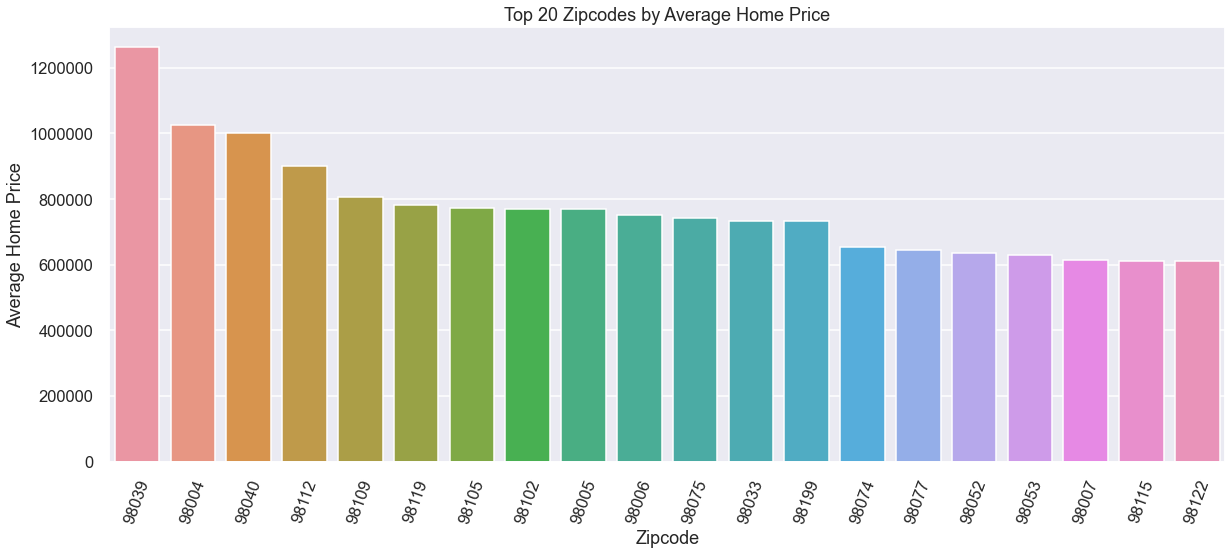

In [90]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set_style('darkgrid')
palette = sns.set_palette("husl", 8)

ax = sns.barplot(x=zip_df.head(20)['zipcode'], y=zip_df.head(20)['price'], order = zip_df.head(20)['zipcode'])
ax.set(xlabel='Zipcode', ylabel='Average Home Price')
plt.ticklabel_format(style='plain', axis= 'y')
plt.xticks(rotation=70)
plt.title('Top 20 Zipcodes by Average Home Price')
sns.set(font_scale=2.0)
plt.show()

***
## Question 2: What Grade of Homes Sell at the Highest Price?

In [91]:
kc_house_df['grade'].unique()

array([ 7,  6,  8,  9, 11, 10,  5])

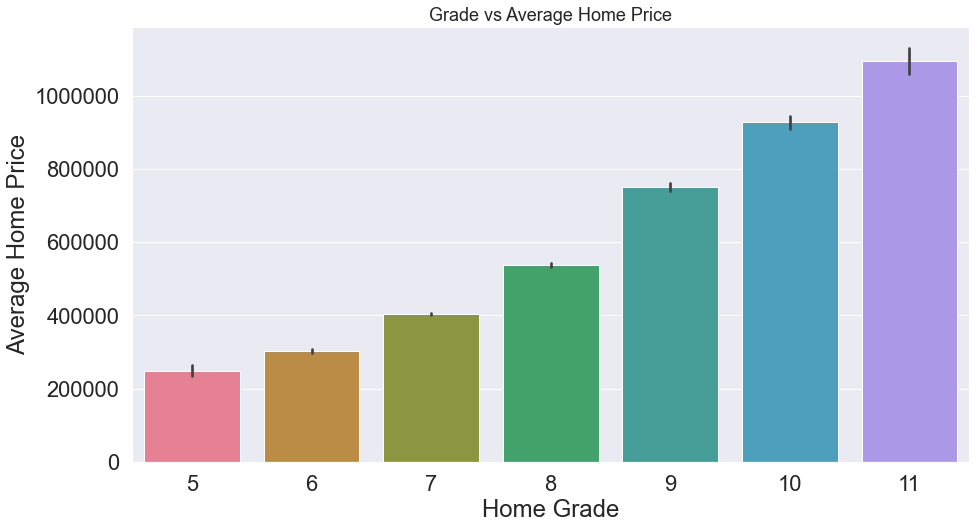

In [92]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
palette = sns.set_palette("husl", 8)
ax = sns.barplot(data=kc_house_df, x = "grade", y = "price")
ax.set(xlabel='Home Grade', 
       ylabel='Average Home Price')
plt.title('Grade vs Average Home Price')
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

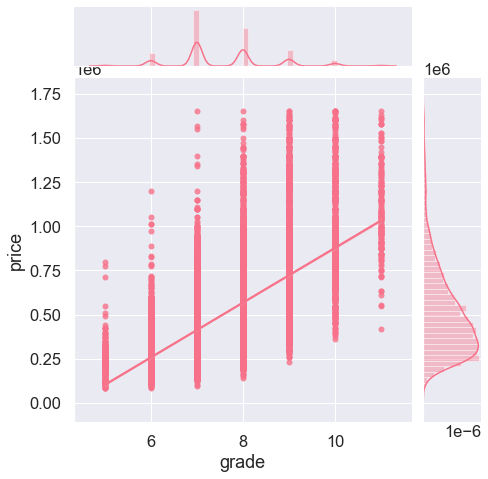

In [93]:
sns.jointplot('grade', 'price', data=kc_house_df, kind='reg', height = 7)
sns.set(font_scale=1.5)

In [94]:
grd_vs_avg_price = kc_house_df.groupby('grade')['price'].mean()

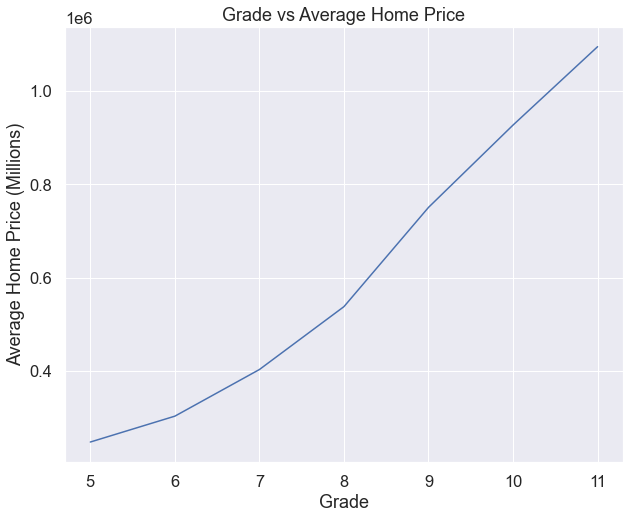

In [95]:
ax = grd_vs_avg_price.plot(figsize=(10,8))
ax.set(xlabel='Grade', ylabel='Average Home Price (Millions)')
plt.title('Grade vs Average Home Price')
plt.show()

***
## Question 3: What Condition of Homes Sell at the Highest Price?

In [96]:
kc_house_df['condition'].unique()

array([3, 5, 4, 2])

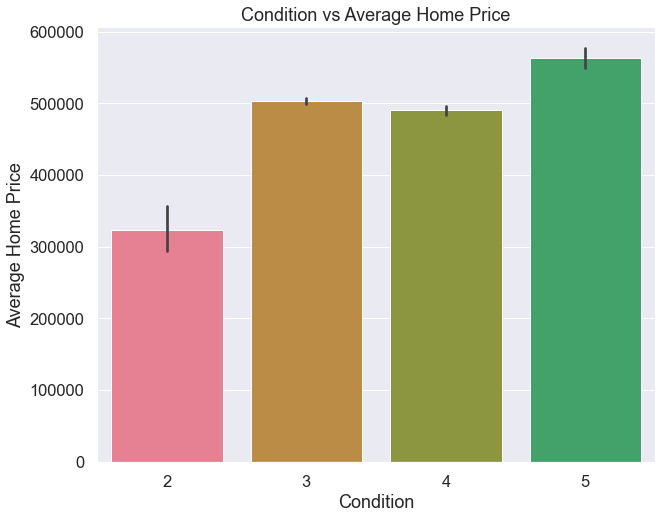

In [97]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
palette = sns.set_palette("husl", 8)
ax = sns.barplot(data=kc_house_df, x = "condition", y = "price")
ax.set(xlabel='Condition', ylabel='Average Home Price')
plt.title('Condition vs Average Home Price')
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

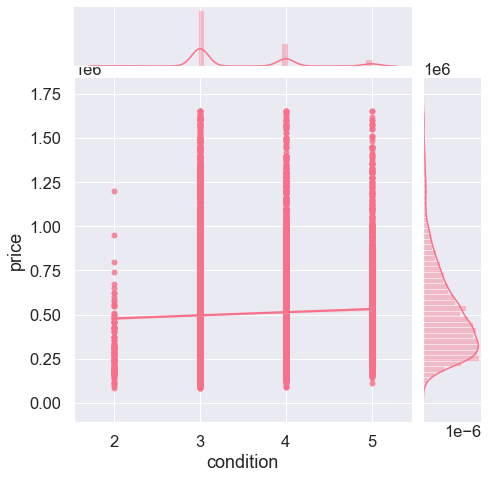

In [98]:
sns.jointplot('condition', 'price', data=kc_house_df, kind='reg', height = 7)
sns.set(font_scale=1.5)

***
# Notes

For this project, I looked to provide answers for important questions for the stakeholder. My first question was regarding the zipcodes that had the most expensive homes. **For someone who is looking to flip houses for profit in King County, WA, it beneficial to look at zipcodes where house prices are high so that they could in turn make a good profit off the house.** If they are able to buy a house in an expensive and renovate it, even if the house is expensive, after rennovation they are more likely to gain a large profit and that being said their return on investment was well worth it. As for my second question, I wanted to know what grade of homes sell at high prices. The building grades ranged from 1-13 (1-3 being the worst and 13 being excellent) **I found that most building grades in King County ranged from 5-11, with a grade of 11 being the most profitable.** This is important information to a stake holder because they need to know the building standards of the houses they plan to rennovate so that they are more desirable on the housing market. My final question was relating the condition of the building to the price of homes. Condition is a factor relative to the age and grade of the building and ranges from 1-5 (1 being poor and 5 being very good). **I found that most building conditions ranged from 2-5, 5 being the most profitiable.** This is important information to a stakeholder because it helps them to know what building conditions to aim for when rennovating a property. Also, knowing a condition of a house that they want to flip can help them negotiate a lower price with the home owner if the home is in very poor condition.